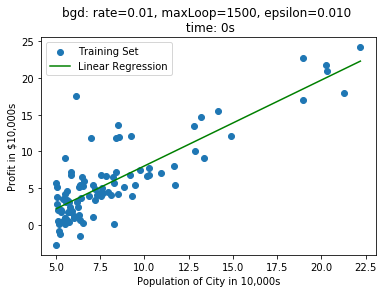

In [2]:
import regression
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
X, y = regression.loadDataSet('data/ex1.txt');

m,n = X.shape
X = np.concatenate((np.ones((m,1)), X), axis=1)

rate = 0.01
maxLoop = 1500
epsilon =0.01

result, timeConsumed = regression.bgd(rate, maxLoop, epsilon, X, y)

theta, errors, thetas = result

# 绘制拟合曲线
fittingFig = plt.figure()
title = 'bgd: rate=%.2f, maxLoop=%d, epsilon=%.3f \n time: %ds'%(rate,maxLoop,epsilon,timeConsumed)
ax = fittingFig.add_subplot(111, title=title)
trainingSet = ax.scatter(X[:, 1].flatten().A[0], y[:,0].flatten().A[0])

xCopy = X.copy()
xCopy.sort(0)
yHat = xCopy*theta
fittingLine, = ax.plot(xCopy[:,1], yHat, color='g')

ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')

plt.legend([trainingSet, fittingLine], ['Training Set', 'Linear Regression'])
plt.show()

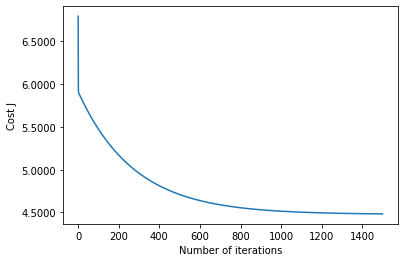

In [3]:
# 绘制误差曲线
errorsFig = plt.figure()
ax = errorsFig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4f'))

ax.plot(range(len(errors)), errors)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost J')

plt.show()

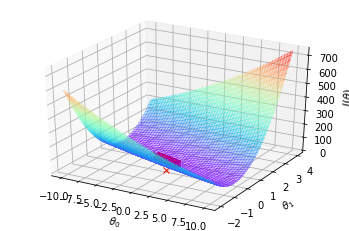

In [4]:
# 绘制能量下降曲面
size = 100
theta0Vals = np.linspace(-10,10, size)
theta1Vals = np.linspace(-2, 4, size)
JVals = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        col = np.matrix([[theta0Vals[i]], [theta1Vals[j]]])
        JVals[i,j] = regression.J(col, X, y)

theta0Vals, theta1Vals = np.meshgrid(theta0Vals, theta1Vals)
JVals = JVals.T
contourSurf = plt.figure()
ax = contourSurf.gca(projection='3d')

ax.plot_surface(theta0Vals, theta1Vals, JVals,  rstride=2, cstride=2, alpha=0.3,
                cmap=cm.rainbow, linewidth=0, antialiased=False)
ax.plot(thetas[0], thetas[1], 'rx')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')

plt.show()

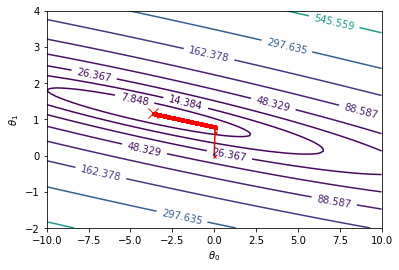

In [5]:
# 绘制能量轮廓
contourFig = plt.figure()
ax = contourFig.add_subplot(111)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

CS = ax.contour(theta0Vals, theta1Vals, JVals, np.logspace(-2,3,20))
plt.clabel(CS, inline=1, fontsize=10)

# 绘制最优解
ax.plot(theta[0,0], theta[1,0], 'rx', markersize=10, linewidth=2)

# 绘制梯度下降过程
ax.plot(thetas[0], thetas[1], 'rx', markersize=3, linewidth=1)
ax.plot(thetas[0], thetas[1], 'r-')

plt.show()